# Random Forest Regression

Random forest builds on the strengths and weaknesses of the decision tree model. Simply, instead of one tree, we build many trees, or a forest and aggregate the results of all those trees to get the prediction from our forest.

Good videos on the random forest algorithm:
1. Random forest concept: https://youtu.be/v6VJ2RO66Ag
2. Random forest concept: https://youtu.be/w-eWTxbRQcU


### Import python libraries

In [21]:
# import data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# import sklearn random forest regressor
from sklearn.ensemble import RandomForestRegressor


## Position Salary Dataset

### Import the dataset

In [6]:
# import dataset
dataset = pd.read_csv('datasets/salary_position.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# split dataset into independent and dependent variables
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# print X and y
print(f'Features: {X}')
print(f'Target: {y}')

Features: [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
Target: [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Train random forest regressor

In [10]:
# train random forest regression model on whole dataset
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=0)

# fit the model
rf_regressor.fit(X, y)

# predict a new result
rf_regressor.predict([[6.5]])

array([167000.])

### Visualize the results

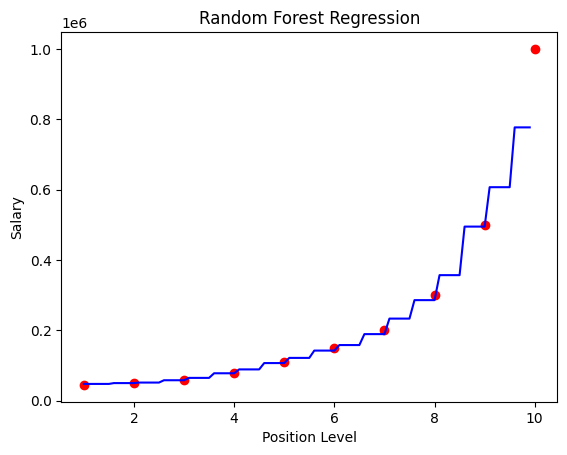

In [9]:
# visualize random forest regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, rf_regressor.predict(X_grid), color='blue')
plt.title('Random Forest Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


## California Housing Dataset

### Load dataset

In [11]:
# load california housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# load dataset
cal_data = fetch_california_housing()

# print cal_data features and target
print(f'Features: {cal_data.feature_names}')
print(f'Target: {cal_data.target_names}')

# print cal_data description
print(cal_data.DESCR)

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: ['MedHouseVal']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is

In [12]:
# split cal data into independent and dependent variables
X_cal = cal_data.data
y_cal = cal_data.target

# print first 5 rows of X and y
print(f'Sample Features: {X_cal[:5]}')
print(f'Sample Target: {y_cal[:5]}')

Sample Features: [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
Sample Target: [4.526 3.585 3.521 3.413 3.422]


### Split data into training and test sets

In [14]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

X_cal_train, X_cal_test, y_cal_train, y_cal_test = train_test_split(X_cal, y_cal, test_size=0.2, random_state=42)

# print number of data points of training and test sets
print(f'Number of training data points: {len(X_cal_train)}')
print(f'Number of test data points: {len(X_cal_test)}')


Number of training data points: 16512
Number of test data points: 4128


### Train random forest regressor on training set

In [22]:
# get tree count from number of training data points
tree_count_log = int(np.log2(len(X_cal_train)))
tree_count_sqrt = int(np.sqrt(len(X_cal_train)))

# record start time
start_time_log = time.time()

# train random forest regression model on training set with log tree count
rf_regressor_log = RandomForestRegressor(n_estimators=tree_count_log, random_state=0)

# fit the model
rf_regressor_log.fit(X_cal_train, y_cal_train)

#record end time
end_time_log = time.time()
log_training_time = end_time_log - start_time_log

# predict test set results
y_cal_log_pred = rf_regressor_log.predict(X_cal_test)

# create y_out by concatenating y_cal_test and y_cal_pred
y_out_log = np.concatenate((y_cal_test.reshape(len(y_cal_test), 1), y_cal_log_pred.reshape(len(y_cal_log_pred), 1)), 1)

# print first 5 rows of y_out
print(f'Target vs Predicted - n log trees \n {y_out_log[:5]}')


# record start time
start_time_sqrt = time.time()

# train random forest regression model on training set with sqrt tree count
rf_regressor_sqrt = RandomForestRegressor(n_estimators=tree_count_sqrt, random_state=0)

# fit the model
rf_regressor_sqrt.fit(X_cal_train, y_cal_train)

# record end time
end_time_sqrt = time.time()
sqrt_training_time = end_time_sqrt - start_time_sqrt

# predict test set results
y_cal_sqrt_pred = rf_regressor_sqrt.predict(X_cal_test)

# create y_out by concatenating y_cal_test and y_cal_pred
y_out_sqrt = np.concatenate((y_cal_test.reshape(len(y_cal_test), 1), y_cal_sqrt_pred.reshape(len(y_cal_sqrt_pred), 1)), 1)

# print first 5 rows of y_out
print(f'Target vs Predicted - n sqrt trees \n {y_out_sqrt[:5]}')


Target vs Predicted - n log trees 
 [[0.477      0.48871429]
 [0.458      0.71257143]
 [5.00001    4.79686429]
 [2.186      2.60757143]
 [2.78       2.11978571]]
Target vs Predicted - n sqrt trees 
 [[0.477      0.48975   ]
 [0.458      0.71919531]
 [5.00001    4.83494391]
 [2.186      2.58432031]
 [2.78       2.30978906]]


### Evaluate Model Performances

In [25]:
# evaluate model performance for log trees
from sklearn.metrics import r2_score

r2_log = r2_score(y_cal_test, y_cal_log_pred)
print(f'R2 Score - n log trees: {r2_log}')
print(f'Time taken - n log trees: {log_training_time}')

# evaluate model performance for sqrt trees
r2_sqrt = r2_score(y_cal_test, y_cal_sqrt_pred)
print(f'R2 Score - n sqrt trees: {r2_sqrt}')
print(f'Time taken - n sqrt trees: {sqrt_training_time}')

R2 Score - n log trees: 0.7920191516190223
Time taken - n log trees: 1.0843074321746826
R2 Score - n sqrt trees: 0.8063181273252072
Time taken - n sqrt trees: 9.844828844070435
